In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2 as cv
import os

In [31]:
data_dir = r'C:\Users\User\Desktop\Niqo-Robotics\Dataset\images_fonts\images'

In [32]:
def get_image_info(data_dir):
    image_urls = []
    class_names = []
    numeric_labels = []

    for dirpath, dirnames, filenames in os.walk(data_dir):
        for dirname in dirnames:
            class_path = os.path.join(dirpath, dirname)
            for filename in os.listdir(class_path):
                image_url = os.path.join(class_path, filename)
                image_urls.append(image_url)
                class_names.append(dirname)
    
    unique_classes = sorted(set(class_names))
    class_to_label = {class_name: idx for idx, class_name in enumerate(unique_classes)}
    numeric_labels = [class_to_label[class_name] for class_name in class_names]
    
    # Create a DataFrame
    df = pd.DataFrame({
        'image_url': image_urls,
        'class_name': class_names,
        'numeric_label': numeric_labels
    })
    
    return df, class_to_label

df, class_to_label = get_image_info(data_dir)

display(df)

# Print the distribution of numeric labels
label_counts = df['numeric_label'].value_counts()
print("\nDistribution of numeric labels:")
print(label_counts)

# Check if the number of images matches the expected number of classes
num_images = len(df)
expected_num_classes = len(set(df['numeric_label']))
print(f"\nNumber of images: {num_images}")
print(f"Expected number of classes: {expected_num_classes}")

# Print the class names and corresponding numeric labels
print("\nClass names and corresponding numeric labels:")
for class_name, label in class_to_label.items():
    print(f"Class: {class_name}, Label: {label}")


,image_url,class_name,numeric_label
0,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Arimo-Regular,0
1,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Arimo-Regular,0
2,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Arimo-Regular,0
3,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Arimo-Regular,0
4,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Arimo-Regular,0
...,...,...,...
105,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Ubuntu-Regular,9
106,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Ubuntu-Regular,9
107,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Ubuntu-Regular,9
108,C:\Users\User\Desktop\Niqo-Robotics\Dataset\im...,Ubuntu-Regular,9



Distribution of numeric labels:
0    11
1    11
2    11
3    11
4    11
5    11
7    11
6    11
8    11
9    11
Name: numeric_label, dtype: int64

Number of images: 110
Expected number of classes: 10

Class names and corresponding numeric labels:
Class: Arimo-Regular, Label: 0
Class: Dancing+Script-Regular, Label: 1
Class: FredokaOne-Regular, Label: 2
Class: NotoSans-Regular, Label: 3
Class: Open+Sans-Regular, Label: 4
Class: Oswald-Regular, Label: 5
Class: PTSerif-Regular, Label: 6
Class: PatuaOne-Regular, Label: 7
Class: Roboto-Regular, Label: 8
Class: Ubuntu-Regular, Label: 9


In [33]:
target_size = (224,224)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df, validation_df = train_test_split(df_shuffled, test_size=0.2, random_state=42, shuffle=True)

print("\nTraining set size:", len(train_df))
print("Validation set size:", len(validation_df))

def load_and_preprocess_image(image_path, target_size):
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, target_size)
    img = img.astype('float32') / 255.0
    return img

train_images = np.array([load_and_preprocess_image(row['image_url'], target_size) for _, row in train_df.iterrows()])
validation_images = np.array([load_and_preprocess_image(row['image_url'], target_size) for _, row in validation_df.iterrows()])

print("\nTraining images loaded:", len(train_images))
print("Validation images loaded:", len(validation_images))

train_labels = to_categorical(train_df['numeric_label'].values)
validation_labels = to_categorical(validation_df['numeric_label'].values)

print("\nFinal dataset shapes:")
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Validation images:", validation_images.shape)
print("Validation labels:", validation_labels.shape)


Training set size: 88
Validation set size: 22

Training images loaded: 88
Validation images loaded: 22

Final dataset shapes:
Train images: (88, 224, 224, 3)
Train labels: (88, 10)
Validation images: (22, 224, 224, 3)
Validation labels: (22, 10)


In [34]:
class_names = [
    "Arimo-Regular",
    "Dancing+Script-Regular",
    "FredokaOne-Regular",
    "NotoSans-Regular",
    "Open+Sans-Regular",
    "Oswald-Regular",
    "PTSerif-Regular",
    "PatuaOne-Regular",
    "Roboto-Regular",
    "Ubuntu-Regular"
]
numeric_labels = list(range(10))

In [35]:
datagen = ImageDataGenerator(
    zoom_range=[1, 1.2],       
    fill_mode='nearest'      
)
train_datagen = datagen.flow(train_images, train_labels, batch_size=32)

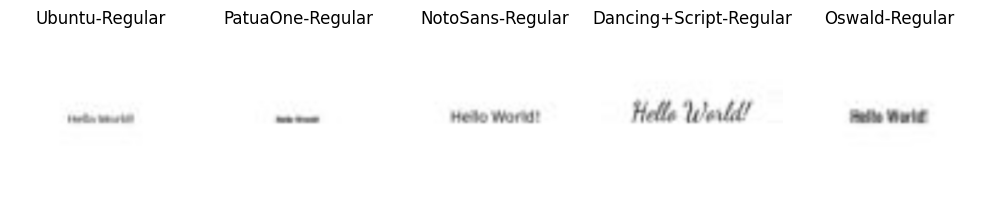

In [36]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def plot_augmented_images(generator, num_images=5):
    # Get a batch of augmented images
    batch = next(generator)
    images, labels = batch[0], batch[1]
    
    # Create a figure for plotting
    plt.figure(figsize=(10, 10))
    
    # Loop through the number of images you want to display
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        
        # Get the predicted class name
        classs = class_names[np.argmax(labels[i])]
        
        plt.title(f"{classs}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot augmented images
plot_augmented_images(train_datagen, num_images=5)


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Function to extract augmented images from the generator
def extract_augmented_data(generator, num_batches):
    images = []
    labels = []
    for _ in range(num_batches):
        batch_images, batch_labels = next(generator)
        images.append(batch_images)
        labels.append(batch_labels)
    images = np.vstack(images)
    labels = np.vstack(labels)
    return images, labels

num_batches = 100 
train_images_augmented, train_labels_augmented = extract_augmented_data(train_datagen, num_batches)

# Convert one-hot encoded labels to integer labels
train_labels_augmented = np.argmax(train_labels_augmented, axis=1)

def flatten_images(images):
    return images.reshape(images.shape[0], -1)

train_images_flat = flatten_images(train_images_augmented)
validation_images_flat = flatten_images(validation_images)

# Convert validation labels to integer format
validation_labels_int = np.argmax(validation_labels, axis=1)

# Train SVC model with linear kernel
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(train_images_flat, train_labels_augmented)

# Evaluate the SVC model
validation_predictions = svc_model.predict(validation_images_flat)
accuracy = accuracy_score(validation_labels_int, validation_predictions)
print(f'Validation accuracy: {accuracy}')
print(classification_report(validation_labels_int, validation_predictions))

Validation accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       1.00      0.50      0.67         2
           6       1.00      0.67      0.80         3
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         1

    accuracy                           0.91        22
   macro avg       0.94      0.90      0.90        22
weighted avg       0.93      0.91      0.90        22



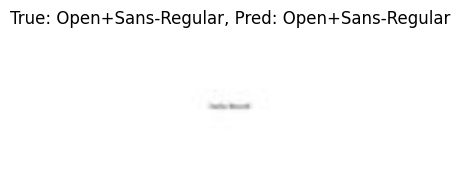

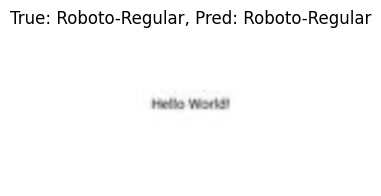

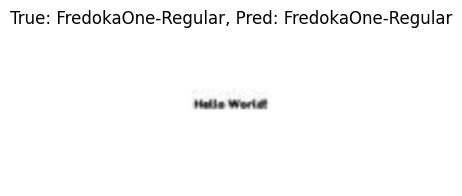

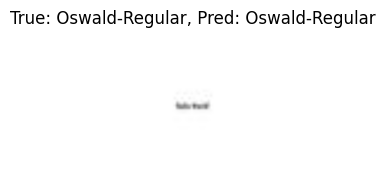

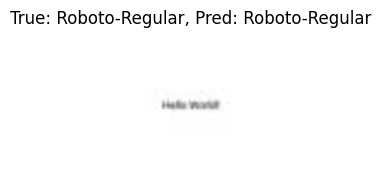

In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def print_random_samples(images, true_labels, predictions, num_samples=5):
    indices = np.random.choice(len(images), num_samples, replace=False)
    
    for idx in indices:
        img = images[idx]
        true_label = true_labels[idx]
        predicted_label = predictions[idx]
        
        # Display the image
        plt.figure(figsize=(2, 2))
        plt.imshow(img)
        
        # Get the predicted class name
        predicted_class = class_names[predicted_label]
        
        # Handle the case where true_label might be an array
        if isinstance(true_label, np.ndarray):
            true_class = class_names[np.argmax(true_label)]
        else:
            true_class = class_names[true_label]
        
        plt.title(f"True: {true_class}, Pred: {predicted_class}")
        plt.axis('off')
        plt.show(block=False)
        plt.pause(1)
        plt.close()

# Call the function to print random samples
print_random_samples(validation_images, validation_labels, validation_predictions, num_samples=5)


In [39]:
import pickle

# Save the trained pipeline to a .pkl file
with open('C:/Users/User/Desktop/Niqo-Robotics/linear_svc_pipeline.pkl', 'wb') as file:
    pickle.dump(svc_model, file)

In [40]:
from PIL import Image
with open(r'C:\Users\User\Desktop\Niqo-Robotics\linear_svc_pipeline.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

def predict_image_from_path(image_path):
    try:
        img = Image.open(image_path)
        img = img.convert('RGB').resize((224, 224))
        img_array = np.array(img).astype(np.float32) / 255
        img_flat = img_array.flatten()
        
        prediction = loaded_model.predict([img_flat])
        return prediction[0]
    
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        return None

# Example usage
image_path = r'C:\Users\User\Desktop\Niqo-Robotics\Dataset\images_fonts\images\Arimo-Regular\img0.jpg'
predicted_label = predict_image_from_path(image_path)

if predicted_label is not None:
    print(f"\nPredicted label for {image_path}: {predicted_label}")
else:
    print("\nFailed to process the image.")


Predicted label for C:\Users\User\Desktop\Niqo-Robotics\Dataset\images_fonts\images\Arimo-Regular\img0.jpg: 0
